In [91]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")


print(tf.__version__)

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))




2.18.0
Num GPUs Available: 1


In [92]:
# import some basic lib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [93]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [94]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [95]:
# divide the dataset into dependent and independent variables

X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [96]:
### feature engineering

geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)


In [97]:
## concatenate the variables with dataframe

X = X.drop(['Geography','Gender'],axis=1)

In [98]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [99]:
X = pd.concat([X,geography,gender],axis = 1)

In [100]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [101]:
# splitting iinto train test
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [102]:
#feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [103]:
X_train.shape

(8000, 11)

### now create ANN

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout


In [105]:
## initialize the ANN
classifier  = Sequential()


In [106]:
### Adding the imput layer
classifier.add(Dense(units=11,activation='relu'))

In [107]:
## first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [108]:
## second HL
classifier.add(Dense(units=6,activation='relu'))

In [109]:
## adding the output layer
classifier.add(Dense(1 ,activation = 'sigmoid')) # 1 = neurons


In [110]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)

In [111]:
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy']) # in otimizer we can use opt also

In [112]:
## Early stopping

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [113]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10 ,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8031 - loss: 0.4703 - val_accuracy: 0.8429 - val_loss: 0.4056
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8419 - loss: 0.3848 - val_accuracy: 0.8398 - val_loss: 0.3944
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8562 - loss: 0.3596 - val_accuracy: 0.8519 - val_loss: 0.3717
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8568 - loss: 0.3537 - val_accuracy: 0.8516 - val_loss: 0.3633
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8710 - loss: 0.3367 - val_accuracy: 0.8485 - val_loss: 0.3729
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8591 - loss: 0.3582 - val_accuracy: 0.8516 - val_loss: 0.3712
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8646 - loss: 0.3352 - val_accuracy: 0.8463 - val_loss: 0.3733
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8630 - loss: 0.3436 - 

In [114]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

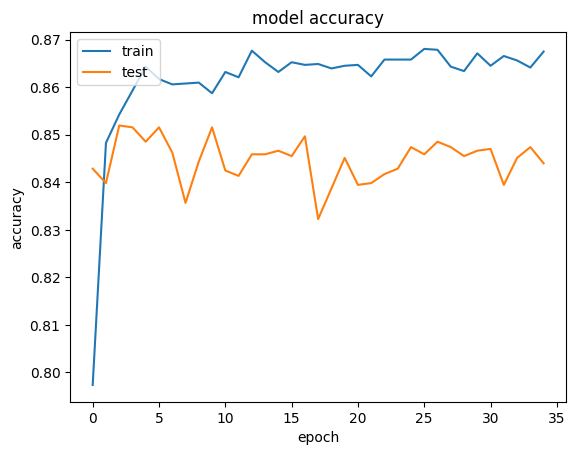

In [115]:
# summarize the history of the accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

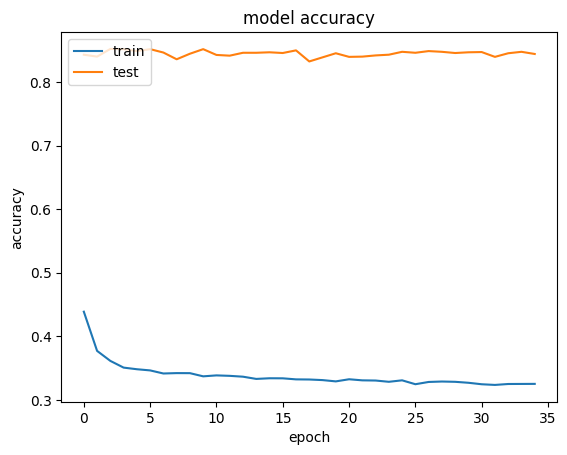

In [116]:
# summarize the history of loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [118]:
# making prediction and evaluation the model

# predicting the test set results

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [119]:
## make confusion metrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


In [120]:
cm

array([[1503,  104],
       [ 186,  207]])

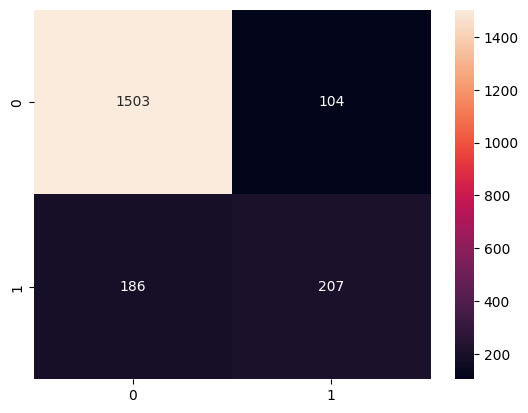

In [127]:
import seaborn as sns
sns.heatmap(cm , annot = True,fmt='d' )
plt.show()


In [128]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.855

In [130]:
# get weight
classifier.get_weights()

[array([[-5.16712546e-01, -1.51518977e+00, -3.46666127e-01,
          5.28277814e-01, -2.46652022e-01, -1.96012780e-01,
          1.28387129e+00,  3.28067064e-01, -2.57528603e-01,
         -5.10050535e-01, -1.01836312e+00],
        [-8.30876008e-02, -4.10966039e-01,  2.41291046e+00,
          2.22528863e+00,  5.53842545e-01,  2.82458639e+00,
          1.37463912e-01,  5.92107356e-01, -1.08082128e+00,
          5.63009381e-01,  5.12260020e-01],
        [-9.93847549e-01,  2.67185289e-02,  1.45627260e-01,
         -4.90211070e-01, -4.20162268e-02,  1.20771736e-01,
          3.73026639e-01,  2.02163622e-01,  1.72353595e-01,
          2.73923218e-01, -1.04182601e+00],
        [-7.39405900e-02,  2.41713226e-01,  7.33479440e-01,
          4.90583897e-01,  2.02160406e+00, -1.29234314e+00,
         -1.18187976e+00,  8.09370100e-01,  1.05991610e-04,
          7.91092813e-01,  5.05990028e-01],
        [ 1.06308734e+00, -9.24445875e-03,  2.22646102e-01,
          1.39197087e+00,  2.22324109e+00, -